Context  
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Content
For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):

1 - fixed acidity  most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity  the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid  found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar  the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides  the amount of salt in the wine

6 - free sulfur dioxide  the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide  amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density  the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH  describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates  a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol  the percent alcohol content of the wine

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

In [2]:
df=pd.read_csv('winequality.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
df.shape

(1599, 12)

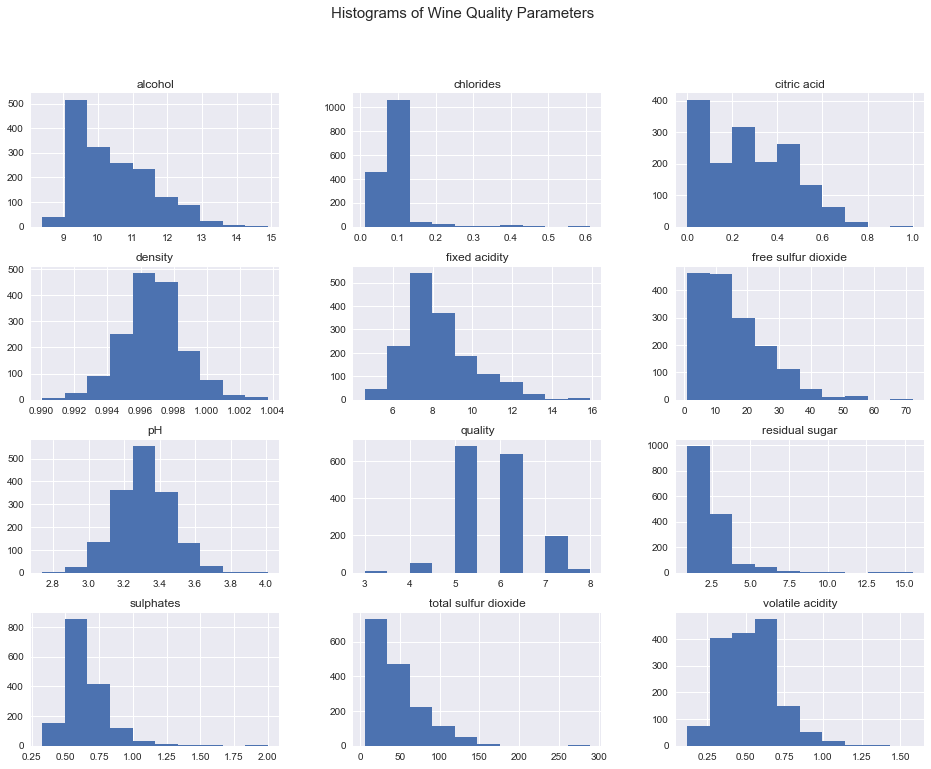

In [8]:
plt.style.use('seaborn')
df.hist(figsize=(16,12))
plt.suptitle('Histograms of Wine Quality Parameters', size=15)
plt.show()

In [9]:
kolom=df.columns

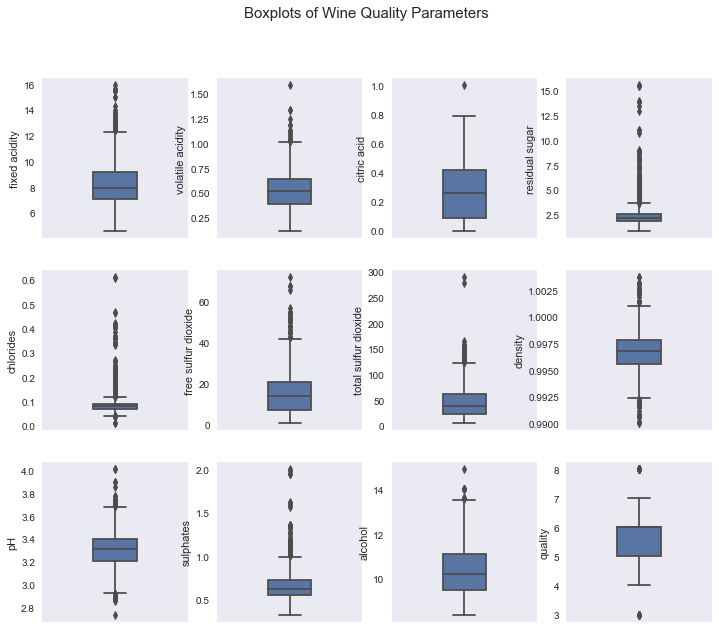

In [19]:
plt.figure(figsize=(12,10))
plt.suptitle('Boxplots of Wine Quality Parameters', size=15)
for i in range(len(kolom)):
    plt.subplot(3,4,i+1)
    sns.boxplot(df[kolom[i]],orient='v', width=0.3)
    plt.grid(False)

In [24]:
def pencilan (x):
    IQR=x.describe()['75%']-x.describe()['25%']
    batasAtas=x.describe()['75%']+(1.5*IQR)
    batasBawah=x.describe()['25%']-(1.5*IQR)
    pencilan=[i for i in x if i>batasAtas or i<batasBawah]
    return pencilan

In [26]:
outliers=[]

for i in kolom:
    outliers.append([i,len(pencilan(df[i]))])
pd.DataFrame(outliers, columns=['Nama Kolom', 'Jumlah Outlier'])

,Nama Kolom,Jumlah Outlier
0,fixed acidity,49
1,volatile acidity,19
2,citric acid,1
3,residual sugar,155
4,chlorides,112
5,free sulfur dioxide,30
6,total sulfur dioxide,55
7,density,45
8,pH,35
9,sulphates,59


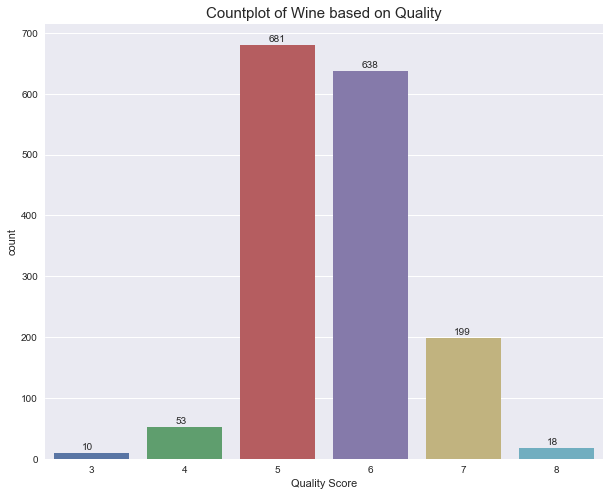

In [46]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="quality", data=df, order=[3,4,5,6,7,8])
plt.title('Countplot of Wine based on Quality', fontdict={'fontsize':15})
plt.xlabel('Quality Score')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

In [ ]:
df.corr()

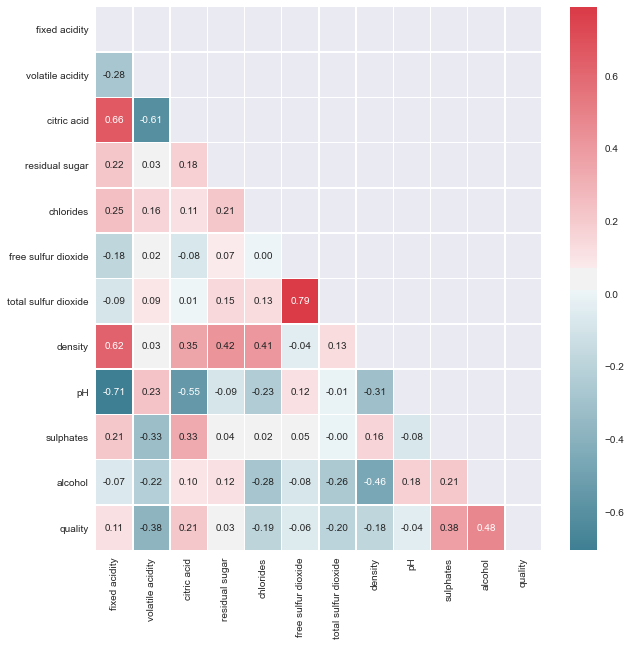

In [47]:

corr = df.corr('spearman')
fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidths=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [ ]:
df['alcohol']=[round(i,2) for i in df['alcohol']]

In [ ]:
plt.figure(figsize=(12,10))

sns.boxplot(x="quality", y="alcohol", data=df)
plt.show()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
normal=[]
for i in kolom:
    k2, p=stats.normaltest(df[f'{i}'])
    if p>0.05:
        result='normal'
    else:
        result='not normal'
    normal.append([k2,p, result])

pd.DataFrame(normal, index=kolom, columns=['k2', 'p-value', 'distribution'])

,k2,p-value,distribution
fixed acidity,224.530878,1.752828e-49,not normal
volatile acidity,143.419344,7.192589e-32,not normal
citric acid,152.039215,9.662822e-34,not normal
residual sugar,1520.323970,0.000000e+00,not normal
chlorides,1783.105923,0.000000e+00,not normal
free sulfur dioxide,342.259148,4.779365e-75,not normal
total sulfur dioxide,487.427256,1.433891e-106,not normal
density,30.707750,2.147320e-07,not normal
pH,33.684697,4.846865e-08,not normal
sulphates,906.894448,1.175907e-197,not normal
